In [3]:
#Load the libraries 

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
import numpy as np

In [1]:
from IPython.display import Image

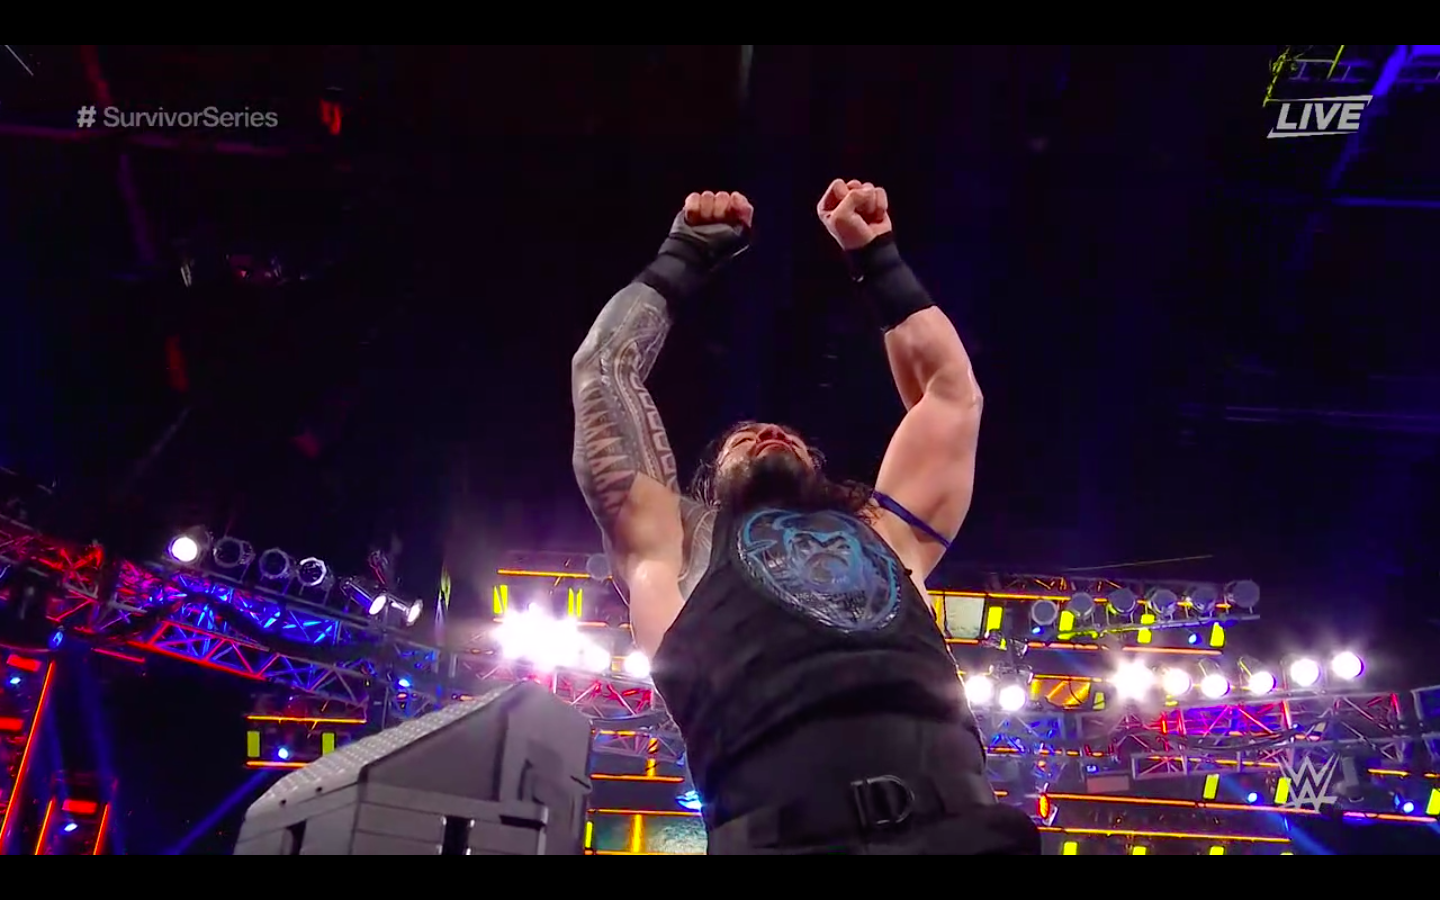

In [2]:
Image(filename='Roman.jpg')

In [4]:
img_path='Roman.jpg'
img=image.load_img(img_path,target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)

In [5]:
#Load the model

model=ResNet50(weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [7]:
preds=model.predict(x)

In [8]:
preds

array([[1.31850264e-08, 3.93159269e-07, 3.99863393e-06, 5.54772953e-07,
        2.21085998e-06, 1.27943167e-06, 4.04371860e-07, 5.53481925e-07,
        4.20790052e-08, 1.44123344e-08, 2.30494770e-08, 1.89510878e-08,
        3.51464564e-08, 1.73642452e-08, 5.41596634e-09, 1.66164341e-07,
        3.26041816e-09, 5.27450830e-08, 6.06257302e-08, 4.90435381e-09,
        3.40863515e-09, 3.34361303e-08, 5.85857229e-08, 3.03743604e-07,
        1.41397308e-07, 1.33477265e-08, 3.28038530e-09, 2.79960211e-09,
        2.56554991e-08, 8.18104411e-08, 1.04845817e-07, 1.46058552e-08,
        1.08388196e-08, 1.19860047e-07, 2.35199082e-07, 3.04301118e-09,
        7.30398639e-08, 3.78144449e-09, 1.51370116e-07, 1.12125420e-07,
        4.64804799e-08, 3.35573951e-08, 8.76027073e-08, 2.52444920e-07,
        4.90312182e-08, 6.76757921e-08, 5.03219111e-09, 3.12465986e-09,
        1.01950668e-07, 3.38360771e-08, 1.90419712e-07, 6.49473941e-06,
        1.68225833e-09, 2.23278800e-08, 2.27011316e-08, 2.826128

In [9]:
print('Predictions:',decode_predictions(preds,top=3)[0])

Predictions: [('n04296562', 'stage', 0.5198154), ('n02777292', 'balance_beam', 0.27788445), ('n03535780', 'horizontal_bar', 0.05500053)]


In [10]:
def classify(img_path):
    display(Image(filename=img_path))
    img=image.load_img(img_path,target_size=(224,224))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    x=preprocess_input(x) #under resnet it does some preprocessing and it is blackbox, you dont know what would happen
    preds=model.predict(x)
    print("Predicted:",decode_predictions(preds,top=10)[0])
    

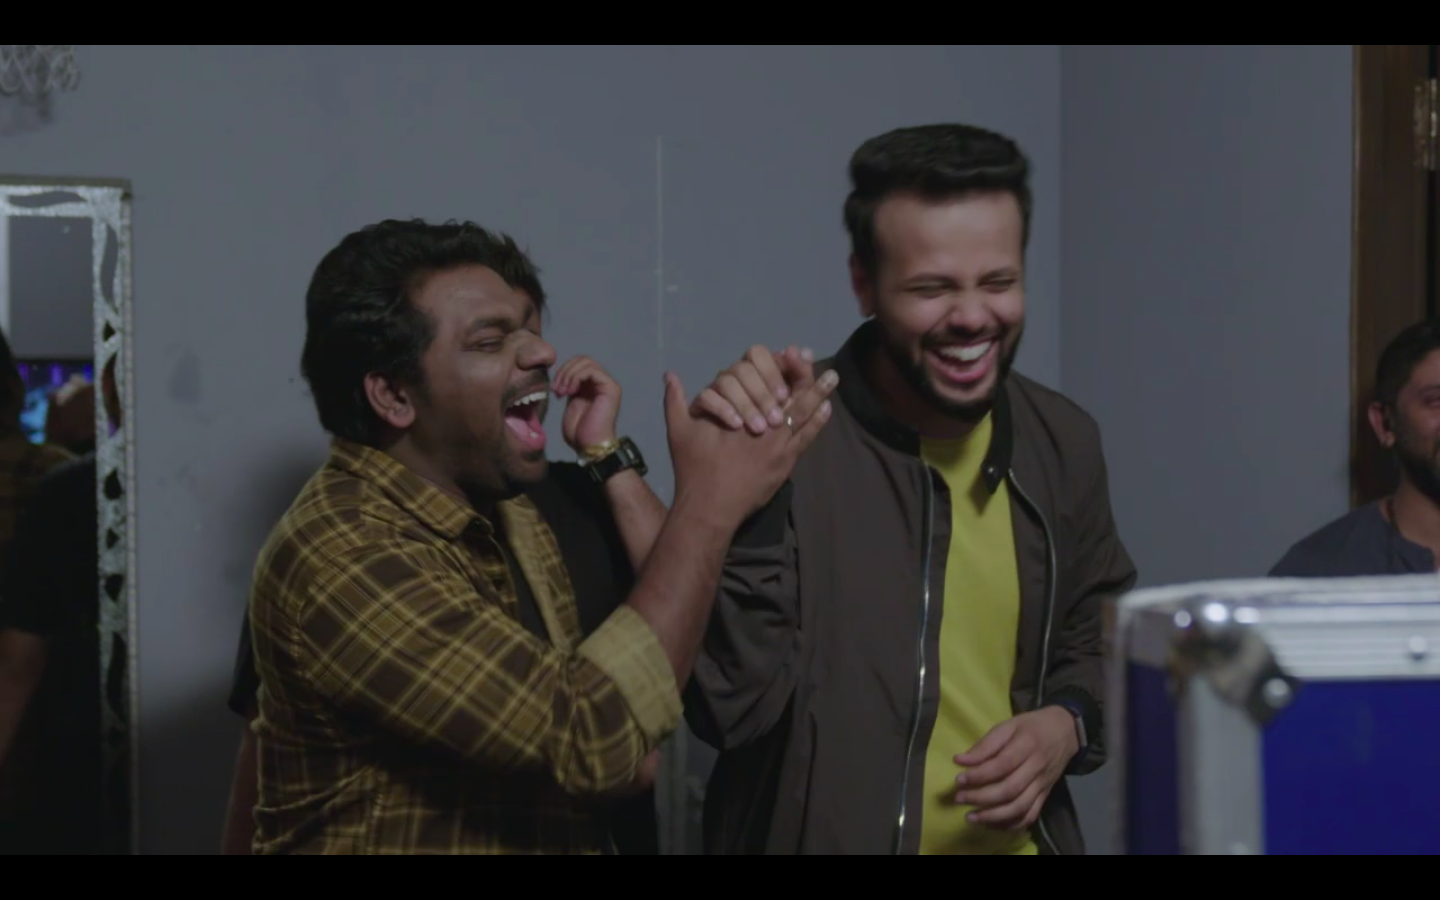

Predicted: [('n04009552', 'projector', 0.2124893), ('n04404412', 'television', 0.07588757), ('n03782006', 'monitor', 0.06303919), ('n06359193', 'web_site', 0.05041899), ('n04070727', 'refrigerator', 0.024509203), ('n02992529', 'cellular_telephone', 0.024427647), ('n04209239', 'shower_curtain', 0.024177838), ('n03832673', 'notebook', 0.02366812), ('n04152593', 'screen', 0.018057423), ('n03197337', 'digital_watch', 0.01789422)]


In [11]:
classify('Zakir.png')

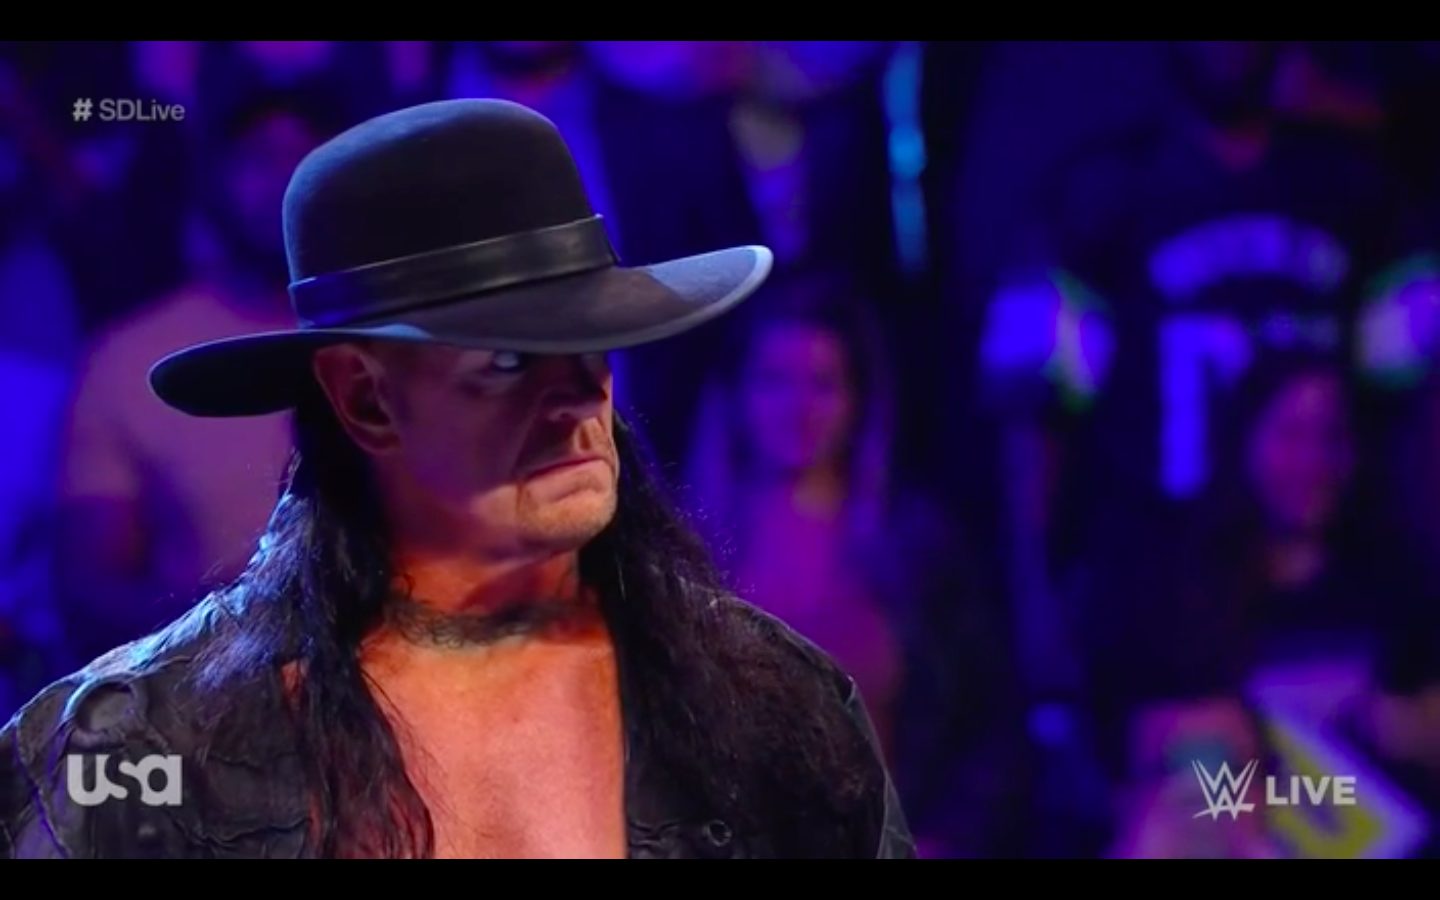

Predicted: [('n03124170', 'cowboy_hat', 0.6959521), ('n04259630', 'sombrero', 0.16470781), ('n04404412', 'television', 0.031242894), ('n04296562', 'stage', 0.02723256), ('n04141076', 'sax', 0.017534753), ('n03782006', 'monitor', 0.008407668), ('n03272010', 'electric_guitar', 0.008276538), ('n03759954', 'microphone', 0.00765421), ('n03529860', 'home_theater', 0.004868575), ('n03720891', 'maraca', 0.0043005277)]


In [12]:
classify('Who.png')

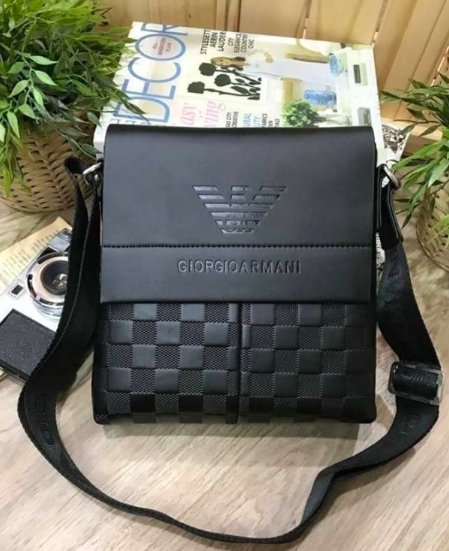

Predicted: [('n02916936', 'bulletproof_vest', 0.27888796), ('n04264628', 'space_bar', 0.22076017), ('n04026417', 'purse', 0.12810391), ('n03709823', 'mailbag', 0.10286363), ('n03777754', 'modem', 0.070663095), ('n02769748', 'backpack', 0.043131843), ('n03527444', 'holster', 0.02120728), ('n03832673', 'notebook', 0.015988763), ('n03991062', 'pot', 0.009297098), ('n03899768', 'patio', 0.008740573)]


In [33]:
classify("GEORGIOARMANI.png")

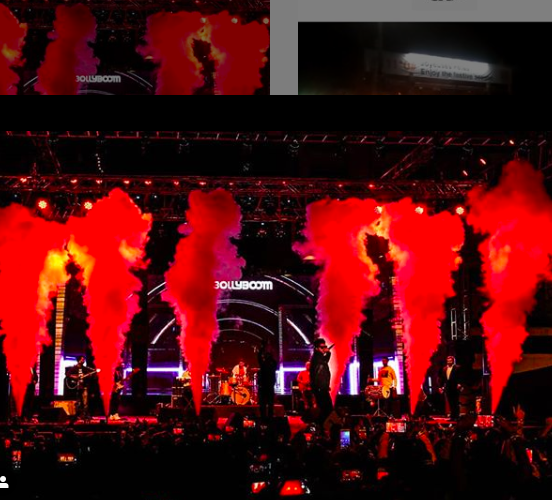

Predicted: [('n04296562', 'stage', 0.8705003), ('n04418357', 'theater_curtain', 0.04805464), ('n03691459', 'loudspeaker', 0.024411038), ('n03388043', 'fountain', 0.010560271), ('n03325584', 'feather_boa', 0.0057592993), ('n09472597', 'volcano', 0.004185211), ('n03028079', 'church', 0.003666238), ('n02699494', 'altar', 0.0024584106), ('n03976657', 'pole', 0.002220201), ('n03345487', 'fire_engine', 0.0017898927)]


In [35]:
classify("Concert.jpg")